<a href="https://colab.research.google.com/github/Sanjeeda-Jeba/ME-592-Spring2025/blob/main/HW4_ME592_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1:

#### Install Gymnasium (by Farama)
##### This gives you the core simulation environments like CartPole and LunarLander.

In [ ]:
!apt-get install -y swig


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,040 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [ ]:
!pip install box2d-py --no-build-isolation --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.8-cp311-cp311-linux_x86_64.whl size=2351180 sha256=665a2d2dc5539e5bd0d8127ab677848b4b296565def00b70dffcdb6f3fbac039
  Stored in directory: /tmp/pip-ephem-wheel-cache-s8ywzfv6/wheels/3f/95/02/4cb5adc9f6dcaeb9639c2271f630a66ab4440102414804c45c
Successfully built box2d-py


In [ ]:
!pip install gymnasium stable-baselines3[extra]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import gymnasium as gym

In [ ]:
env = gym.make("LunarLander-v3")
obs, info = env.reset()
print("LunarLander-v3 environment loaded successfully!")

LunarLander-v3 environment loaded successfully!


# TASK 2:
CartPole Solution (Simple DQN)

This makes the cart balance the pole using simple neural network

In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
## Creating CartPole Environment

env = gym.make("CartPole-v1")

In [ ]:
# The DQN agent with a simple MLP policy

model = DQN(
    policy="MlpPolicy",       # Multi-layer perceptron
    env=env,                  # Environment to learn from
    learning_rate=3e-4,       # A good starting point
    verbose=1,                # Show training logs
    buffer_size=10000,        # Replay buffer size
    learning_starts=1000,     # Delay learning until enough samples
    batch_size=32,            # Mini-batch size
    tau=1.0,                  # Target network update factor
    gamma=0.99,               # Discount factor
    train_freq=4,             # Train every 4 steps
    target_update_interval=1000,  # Target network update frequency
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Training the agent

model.learn(total_timesteps=20000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 18       |
|    exploration_rate | 0.966    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4937     |
|    time_elapsed     | 0        |
|    total_timesteps  | 72       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.938    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5088     |
|    time_elapsed     | 0        |
|    total_timesteps  | 130      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 14.8     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes       

In [ ]:
# Evaluation

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)
print(f"\n Evaluation over 100 episodes: mean_reward={mean_reward:.2f}, std_reward={std_reward:.2f}")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(



 Evaluation over 100 episodes: mean_reward=67.52, std_reward=8.25


In [ ]:
#test Performance
obs, _ = env.reset()
done = False
while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, _ = env.step(action)
    env.render()
env.close()


/usr/local/lib/python3.11/dist-packages/gymnasium/envs/classic_control/cartpole.py:250: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


# TASK 3:

Lunar Lander

In [ ]:
from stable_baselines3 import PPO
#Basic PPO Training

# Create the environment
env = gym.make("LunarLander-v3")

# Define the PPO model
model = PPO(
    policy="MlpPolicy",
    env=env,
    learning_rate=3e-4,
    verbose=1,
    tensorboard_log="./ppo_lunarlander_tensorboard/"
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Train the model
model.learn(total_timesteps=300_000)

Logging to ./ppo_lunarlander_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.7     |
|    ep_rew_mean     | -182     |
| time/              |          |
|    fps             | 942      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 85.8         |
|    ep_rew_mean          | -174         |
| time/                   |              |
|    fps                  | 697          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0038644248 |
|    clip_fraction        | 0.0124       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explai

Explanation: we created the environment and the PPO agent, trained the agent for 300,000 steps. No extra monitoring or evaluation during training. We only know how the training went after it’s done.

In [ ]:
# Evaluate the agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)
print(f"🚀 Evaluation over 100 episodes: mean_reward={mean_reward:.2f}, std_reward={std_reward:.2f}")

🚀 Evaluation over 100 episodes: mean_reward=45.94, std_reward=128.30


Now adding-- PPO Training with **EvalCallback**

Every 10,000 steps, the agent is evaluated (tested) on the environment. If the agent performs better than before, the model is saved as the “best model.” We got logs about how well the agent is doing during training, not just at the end.

In [ ]:
# Adding performance tracking:
from stable_baselines3.common.callbacks import EvalCallback

eval_callback = EvalCallback(
    env,
    eval_freq=10_000,  # Check every 10k steps
    best_model_save_path="./best_model"
)

# 3. Modify training line:
model.learn(total_timesteps=300_000, callback=eval_callback)

Logging to ./ppo_lunarlander_tensorboard/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 461      |
|    ep_rew_mean     | 136      |
| time/              |          |
|    fps             | 944      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 423         |
|    ep_rew_mean          | 67.7        |
| time/                   |             |
|    fps                  | 639         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.003943033 |
|    clip_fraction        | 0.0257      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.751      |
|    explained_variance  

Logging to ./ppo_lunarlander_tensorboard/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 357      |
|    ep_rew_mean     | 170      |
| time/              |          |
|    fps             | 674      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 303104   |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 354         |
|    ep_rew_mean          | 175         |
| time/                   |             |
|    fps                  | 614         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 305152      |
| train/                  |             |
|    approx_kl            | 0.003680462 |
|    clip_fraction        | 0.0414      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.611      |
|    explained_variance  

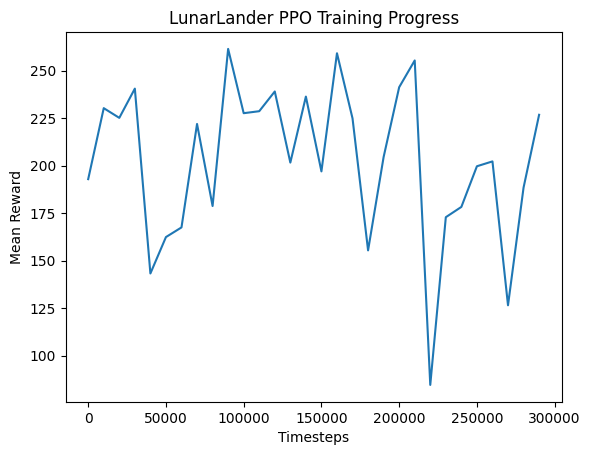

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

rewards = []
eval_episodes = 5
eval_every = 10000

for step in range(0, 300_000, eval_every):
    model.learn(total_timesteps=eval_every, reset_num_timesteps=False)
    mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=eval_episodes, render=False)
    rewards.append(mean_reward)

import matplotlib.pyplot as plt
plt.plot([i * eval_every for i in range(len(rewards))], rewards)
plt.xlabel('Timesteps')
plt.ylabel('Mean Reward')
plt.title('LunarLander PPO Training Progress')
plt.show()


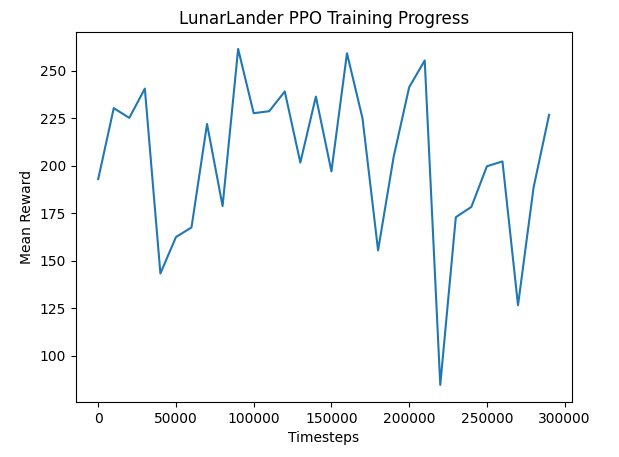

# TASK 4:

In [ ]:
import torch
from stable_baselines3.common.env_util import make_vec_env

# Custom network architecture
policy_kwargs = dict(
    net_arch=[dict(pi=[128, 128], vf=[128, 128])],  # Policy/value networks
    activation_fn=torch.nn.Tanh  # Use Tanh instead of ReLU
)



# Create vectorized environment
env = make_vec_env("LunarLander-v3", n_envs=1)


# Train PPO with custom config
model = PPO(
    policy="MlpPolicy",
    env=env,
    learning_rate=5e-4,
    ent_coef=0.01,                 # Encourage exploration
    batch_size=128,
    n_steps=2048,
    gae_lambda=0.95,
    policy_kwargs=policy_kwargs,
    verbose=1,
    tensorboard_log="./ppo_custom_tensorboard/"
)

Using cpu device


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


In [ ]:
model.learn(total_timesteps=300_000)

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 78       |
|    ep_rew_mean     | -151     |
| time/              |          |
|    fps             | 554      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 83.1        |
|    ep_rew_mean          | -133        |
| time/                   |             |
|    fps                  | 572         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009600574 |
|    clip_fraction        | 0.0647      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0

In [ ]:
# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=100)
print(f" Evaluation over 100 episodes: mean_reward={mean_reward:.2f}, std_reward={std_reward:.2f}")

 Evaluation over 100 episodes: mean_reward=183.77, std_reward=100.28


**Training Metrics Visualization**

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 329      |
|    ep_rew_mean     | 208      |
| time/              |          |
|    fps             | 562      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 303104   |
---------------------------------


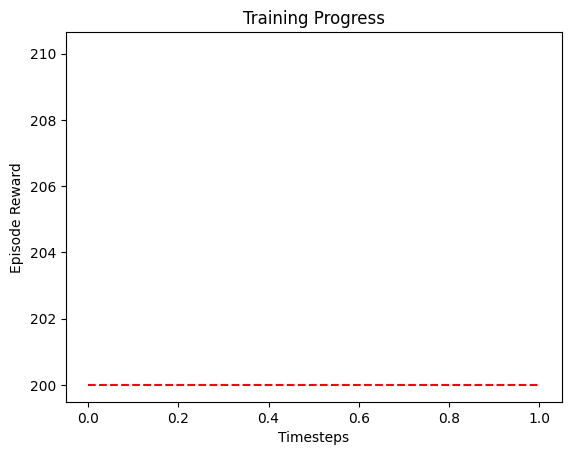

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 326      |
|    ep_rew_mean     | 214      |
| time/              |          |
|    fps             | 706      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 305152   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 322      |
|    ep_rew_mean     | 213      |
| time/              |          |
|    fps             | 531      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 307200   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 315      |
|    ep_rew_mean     | 215      |
| time/              |          |
|    fps             | 6

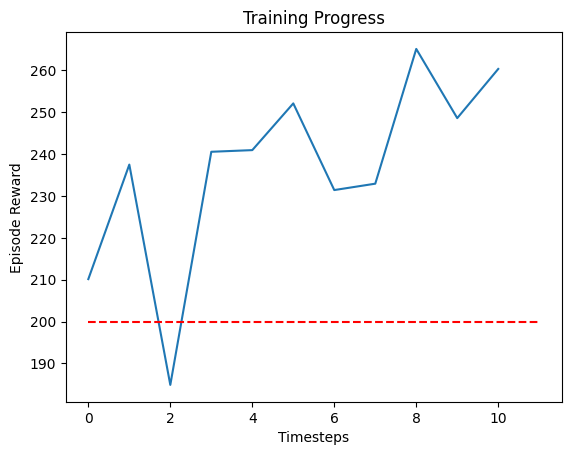

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 308      |
|    ep_rew_mean     | 226      |
| time/              |          |
|    fps             | 515      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 325632   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 303      |
|    ep_rew_mean     | 223      |
| time/              |          |
|    fps             | 670      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 327680   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 297      |
|    ep_rew_mean     | 224      |
| time/              |          |
|    fps             | 6

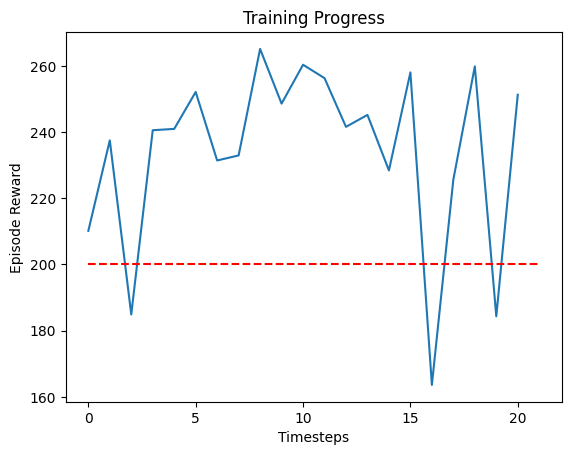

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 320      |
|    ep_rew_mean     | 233      |
| time/              |          |
|    fps             | 682      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 346112   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 331      |
|    ep_rew_mean     | 230      |
| time/              |          |
|    fps             | 559      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 348160   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 333      |
|    ep_rew_mean     | 228      |
| time/              |          |
|    fps             | 6

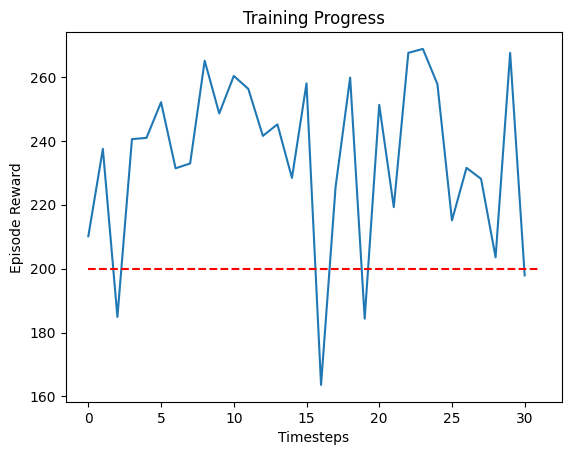

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 318      |
|    ep_rew_mean     | 227      |
| time/              |          |
|    fps             | 501      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 366592   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 317      |
|    ep_rew_mean     | 221      |
| time/              |          |
|    fps             | 589      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 368640   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 317      |
|    ep_rew_mean     | 220      |
| time/              |          |
|    fps             | 7

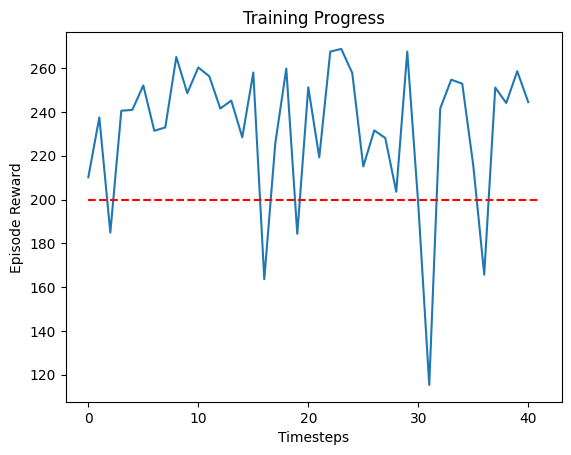

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 282      |
|    ep_rew_mean     | 225      |
| time/              |          |
|    fps             | 761      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 387072   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 281      |
|    ep_rew_mean     | 231      |
| time/              |          |
|    fps             | 802      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 389120   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 288      |
|    ep_rew_mean     | 231      |
| time/              |          |
|    fps             | 4

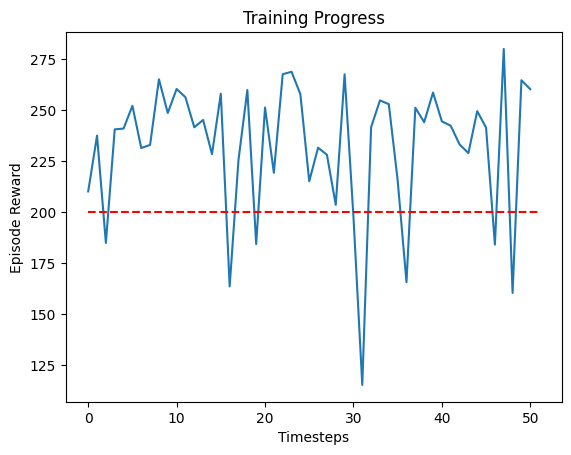

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 274      |
|    ep_rew_mean     | 245      |
| time/              |          |
|    fps             | 709      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 407552   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 276      |
|    ep_rew_mean     | 246      |
| time/              |          |
|    fps             | 704      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 409600   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 277      |
|    ep_rew_mean     | 243      |
| time/              |          |
|    fps             | 6

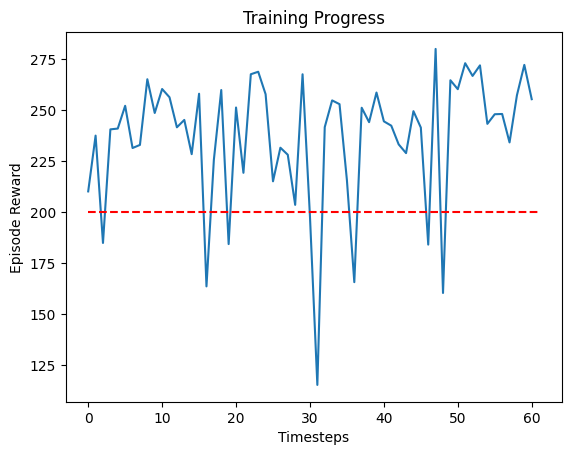

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 256      |
|    ep_rew_mean     | 255      |
| time/              |          |
|    fps             | 711      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 428032   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 267      |
|    ep_rew_mean     | 255      |
| time/              |          |
|    fps             | 597      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 430080   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 278      |
|    ep_rew_mean     | 255      |
| time/              |          |
|    fps             | 5

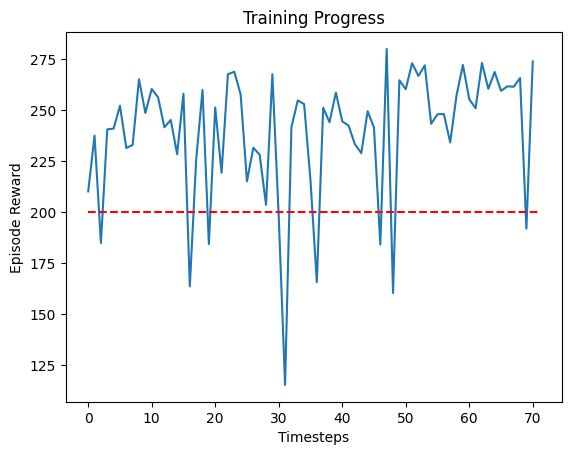

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 323      |
|    ep_rew_mean     | 255      |
| time/              |          |
|    fps             | 569      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 448512   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 323      |
|    ep_rew_mean     | 255      |
| time/              |          |
|    fps             | 680      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 450560   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 328      |
|    ep_rew_mean     | 255      |
| time/              |          |
|    fps             | 4

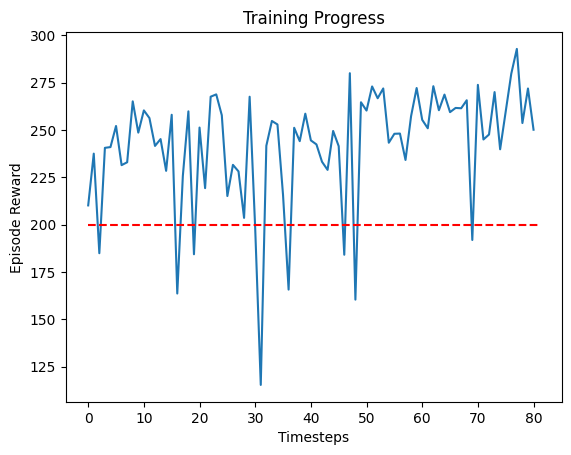

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 299      |
|    ep_rew_mean     | 242      |
| time/              |          |
|    fps             | 704      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 468992   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 285      |
|    ep_rew_mean     | 243      |
| time/              |          |
|    fps             | 773      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 471040   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 280      |
|    ep_rew_mean     | 245      |
| time/              |          |
|    fps             | 7

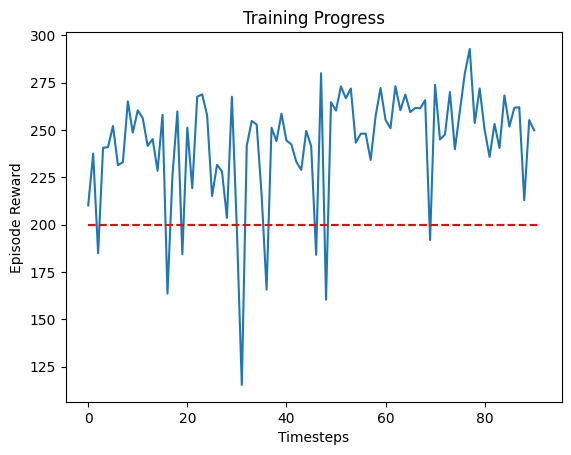

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 288      |
|    ep_rew_mean     | 226      |
| time/              |          |
|    fps             | 746      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 489472   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 281      |
|    ep_rew_mean     | 231      |
| time/              |          |
|    fps             | 781      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 491520   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 276      |
|    ep_rew_mean     | 236      |
| time/              |          |
|    fps             | 8

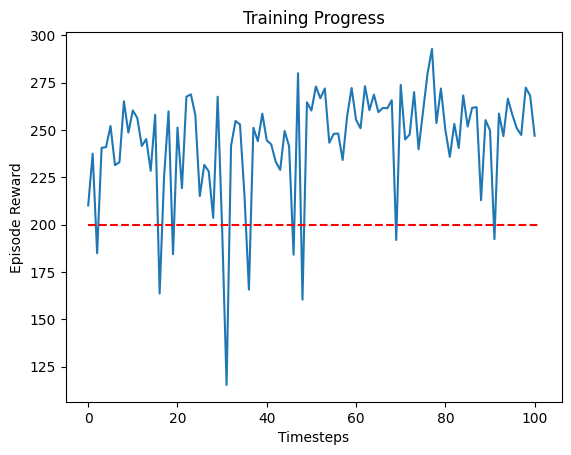

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 259      |
|    ep_rew_mean     | 239      |
| time/              |          |
|    fps             | 820      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 509952   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 243      |
|    ep_rew_mean     | 241      |
| time/              |          |
|    fps             | 634      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 512000   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 242      |
|    ep_rew_mean     | 243      |
| time/              |          |
|    fps             | 7

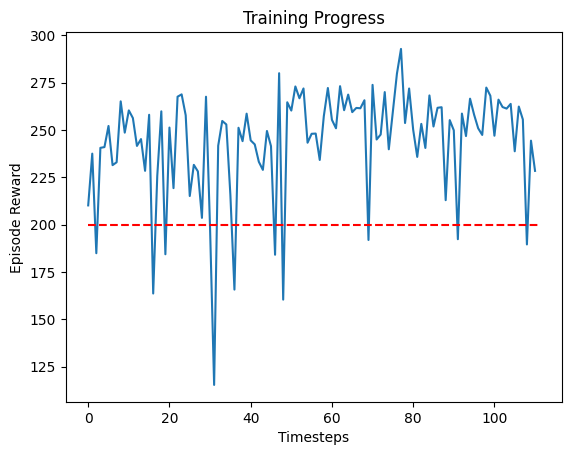

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 243      |
|    ep_rew_mean     | 254      |
| time/              |          |
|    fps             | 812      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 530432   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 241      |
|    ep_rew_mean     | 255      |
| time/              |          |
|    fps             | 784      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 532480   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 245      |
|    ep_rew_mean     | 256      |
| time/              |          |
|    fps             | 7

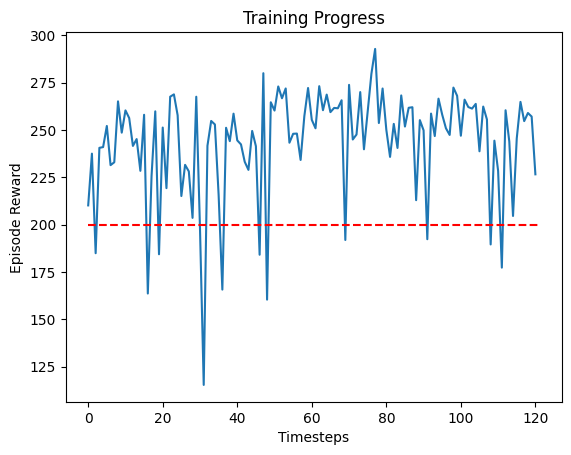

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 240      |
|    ep_rew_mean     | 244      |
| time/              |          |
|    fps             | 620      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 550912   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 244      |
|    ep_rew_mean     | 245      |
| time/              |          |
|    fps             | 757      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 552960   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 243      |
|    ep_rew_mean     | 250      |
| time/              |          |
|    fps             | 5

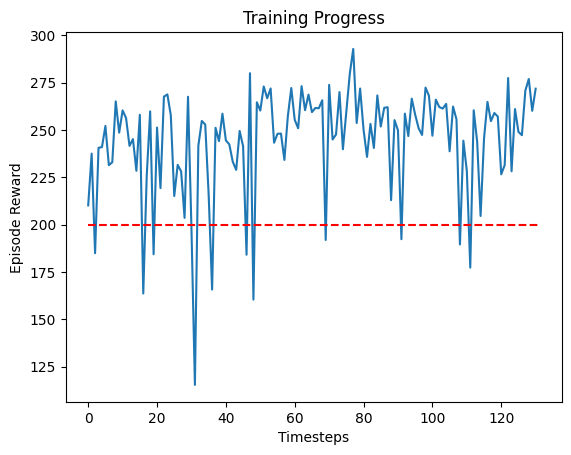

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 251      |
|    ep_rew_mean     | 254      |
| time/              |          |
|    fps             | 476      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 571392   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 244      |
|    ep_rew_mean     | 252      |
| time/              |          |
|    fps             | 650      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 573440   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 245      |
|    ep_rew_mean     | 249      |
| time/              |          |
|    fps             | 7

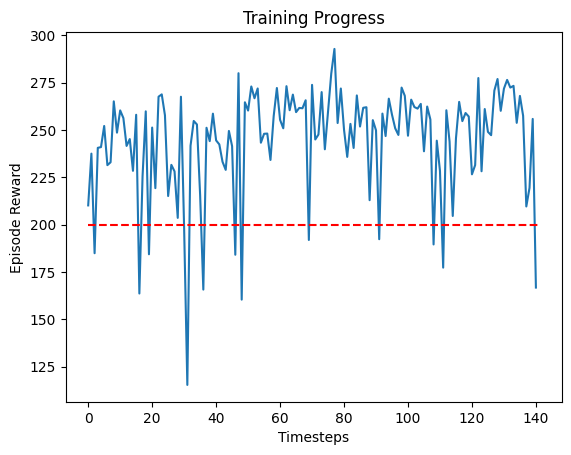

Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 258      |
|    ep_rew_mean     | 251      |
| time/              |          |
|    fps             | 600      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 591872   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 260      |
|    ep_rew_mean     | 251      |
| time/              |          |
|    fps             | 706      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 593920   |
---------------------------------
Logging to ./ppo_custom_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 268      |
|    ep_rew_mean     | 251      |
| time/              |          |
|    fps             | 5

In [ ]:
import matplotlib.pyplot as plt

# Plot rewards during training
def plot_training(rewards, threshold=200):
    plt.plot(rewards)
    plt.xlabel('Timesteps')
    plt.ylabel('Episode Reward')
    plt.title('Training Progress')
    plt.hlines(threshold, 0, len(rewards), colors='r', linestyles='dashed')
    plt.show()

# Add this inside training loop
rewards = []
for timestep in range(0, 300000, 1000):
    model.learn(1000, reset_num_timesteps=False)
    rewards.append(evaluate_policy(model, env, n_eval_episodes=5)[0])
    if timestep % 10000 == 0:
        plot_training(rewards)

**Explanation:**

Y-axis (Episode Reward): This is the average total reward agent gets per episode. Higher is better.

X-axis (Timesteps): This is how many training steps agent has taken.

Blue Line: Plots the mean reward over several evaluation episodes every 1,000 timesteps.

Red Dashed Line (Threshold): Set at 200. For LunarLander-v3, a reward above 200 means the agent is consistently landing well and is considered to have “solved” the environment.

Interpretation: this agent’s reward fluctuates (which is normal in RL), but it’s mostly above the threshold. Occasional drops are expected but the overall trend is strong. Ovrall, it's indicating agent is learning and performing well.